In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
zoo_df = pd.read_csv(r"C:\Users\Lenovo\Documents\Assignments\zoo.csv")

In [4]:
zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
type           101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64


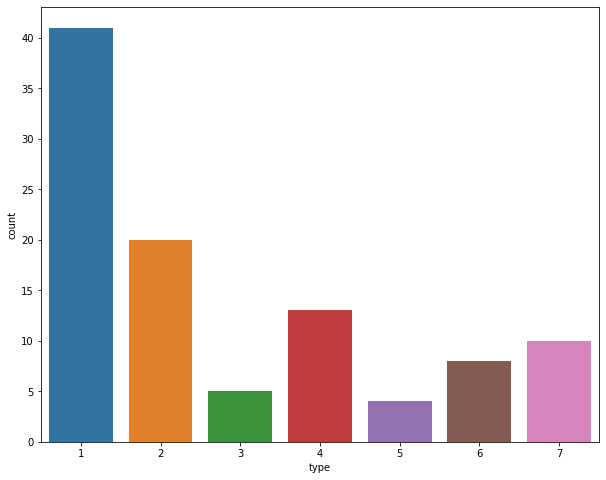

In [7]:
print(zoo_df.type.value_counts())
plt.figure(figsize = (10,8))
sns.countplot(zoo_df.type)
plt.show()

In [8]:
data = zoo_df.copy()
data.drop("animal name",axis = 1,inplace = True)

In [9]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [10]:
x = data.drop("type",axis = 1)
y = data.type.values

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 42)
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (60, 16)
x_test shape :  (41, 16)
y_train shape :  (60,)
y_test shape :  (41,)


Best K value =  1
Best score =  0.9512195121951219


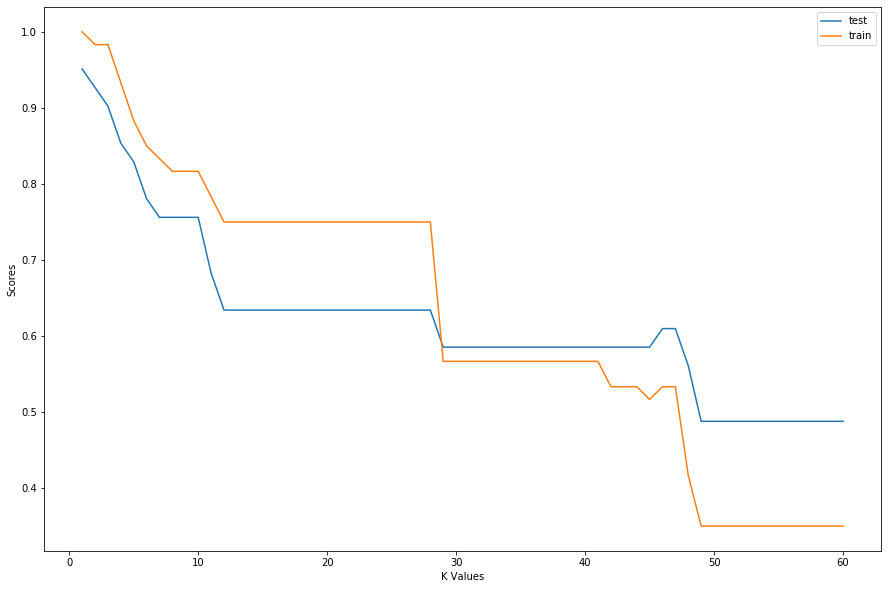

In [12]:
from sklearn.neighbors import KNeighborsClassifier
scr_max = 0
knn_test_score_list = []
knn_train_score_list = []

for i in range(1,x_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    knn_test_scr = knn.score(x_test,y_test)
    knn_test_score_list.append(knn_test_scr)
    knn_train_scr = knn.score(x_train,y_train)
    knn_train_score_list.append(knn_train_scr)
    if knn_test_scr >= scr_max:
        scr_max = knn_test_scr
        index = i

print("Best K value = ",index)
print("Best score = ",scr_max)

plt.figure(figsize = (15,10))
plt.plot(range(1,x_train.shape[0]+1),knn_test_score_list,label = "test")
plt.plot(range(1,x_train.shape[0]+1),knn_train_score_list,label = "train")
plt.legend()
plt.xlabel("K Values")
plt.ylabel("Scores")
plt.show()

In [ ]:
Best k value is 1 for both the train and test data

In [13]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
cr_knn = classification_report(y_test,y_pred_knn)
cm_knn = confusion_matrix(y_test,y_pred_knn)
print("confusion matrix : \n",cm_knn)
print("classification report : \n",cr_knn)

confusion matrix : 
 [[20  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  4]]
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         5
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       0.83      1.00      0.91         5
           7       1.00      0.80      0.89         5

    accuracy                           0.95        41
   macro avg       0.93      0.90      0.89        41
weighted avg       0.96      0.95      0.95        41



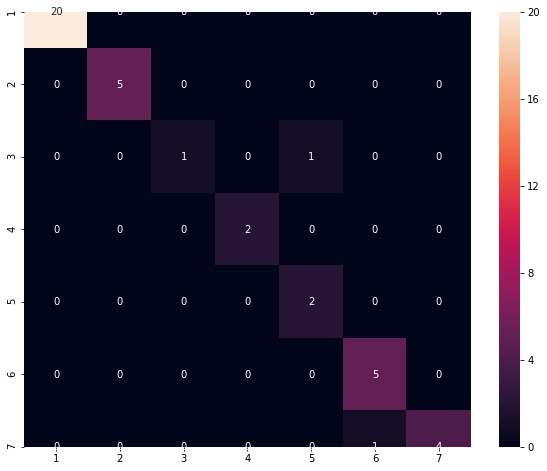

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_knn,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8))
plt.show()

In [15]:

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
cr_knn = classification_report(y_test,y_pred_knn)
cm_knn = confusion_matrix(y_test,y_pred_knn)
print("confusion matrix : \n",cm_knn)
print("classification report : \n",cr_knn)

confusion matrix : 
 [[19  0  0  1  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 1  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  1  0  2  1]]
classification report : 
               precision    recall  f1-score   support

           1       0.95      0.95      0.95        20
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         2
           4       0.40      1.00      0.57         2
           5       1.00      1.00      1.00         2
           6       0.71      1.00      0.83         5
           7       1.00      0.20      0.33         5

    accuracy                           0.83        41
   macro avg       0.72      0.74      0.67        41
weighted avg       0.86      0.83      0.80        41



In [16]:

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
cr_knn = classification_report(y_test,y_pred_knn)
cm_knn = confusion_matrix(y_test,y_pred_knn)
print("confusion matrix : \n",cm_knn)
print("classification report : \n",cr_knn)

confusion matrix : 
 [[19  0  0  1  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 1  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 2  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  2  0  3  0]]
classification report : 
               precision    recall  f1-score   support

           1       0.86      0.95      0.90        20
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         2
           4       0.33      1.00      0.50         2
           5       0.00      0.00      0.00         2
           6       0.62      1.00      0.77         5
           7       0.00      0.00      0.00         5

    accuracy                           0.76        41
   macro avg       0.40      0.56      0.45        41
weighted avg       0.64      0.76      0.68        41



In [ ]:
As predicted N values as 1 gives the best prediction.